# Sporting Events: Pregame Traffic

This notebook explores and summarizes pregame traffic for each sport.

---
## Setup

In [1]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
### Additional Configuration

# Matplotlib.
% matplotlib inline

# Seaborn.
sns.set_style('whitegrid')

In [3]:
### Settings

# Import general sports settings.
from sports_settings import *

# Visualization settings and objects.
from sports_vis_objects import *

In [4]:
# Chart display style.
# default_chart_format = 'poster'

---
## Data

### Read

In [5]:
# Read team schedules.
# games = {
#     'bruins':  pd.read_csv('../../../data/sports_analysis/bruins.csv'),
#     'celtics': pd.read_csv('../../../data/sports_analysis/celtics.csv'),
#     'sox':     pd.read_csv('../../../data/sports_analysis/sox.csv')
# }

# Read all pregame data.
pregame = {
    'bruins':  pd.read_csv('../../../data/sports_analysis/bruins_pregame.csv'),
    'celtics': pd.read_csv('../../../data/sports_analysis/celtics_pregame.csv'),
    'sox':     pd.read_csv('../../../data/sports_analysis/sox_pregame.csv')
}

# Read station data as well.
pregame_stations = {
    'bruins':  pd.read_csv('../../../data/sports_analysis/bruins_pregame_station.csv'),
    'celtics': pd.read_csv('../../../data/sports_analysis/celtics_pregame_station.csv'),
    'sox':     pd.read_csv('../../../data/sports_analysis/sox_pregame_station.csv')
}

### Aggregations

In [6]:
# Aggregate by hours until game.
pregame_agg_hours = {}
for t,d in pregame.iteritems():
    pregame_agg_hours[t] = d.groupby('hours_until_game_start').agg(np.mean).drop('game_id',axis=1).reset_index()
    pregame_agg_hours[t]['lift_entries'] = pregame_agg_hours[t].drop('hours_until_game_start',axis=1).sum(axis=1)

# Aggregate by game ID.
pregame_agg_game = {}
for t,d in pregame.iteritems():
    pregame_agg_game[t] = d.groupby('game_id').agg(np.sum).drop('hours_until_game_start',axis=1).reset_index()
    pregame_agg_game[t]['lift_entries'] = pregame_agg_game[t].drop('game_id',axis=1).sum(axis=1)

# Aggregate per station
pregame_stations_agg = {}
for t,d in pregame_stations.iteritems():
    pregame_stations_agg[t] = d.groupby('name').agg(np.sum).drop('hours_until_game_start',axis=1).reset_index()
    pregame_stations_agg[t]['lift_entries'] = pregame_stations_agg[t].drop('name',axis=1).sum(axis=1)

---
## Visualization

### Pregame Lift by Sport, Line

We want to examine aggregate lift across lines and in the aggregate. Because sets of charts will be so similar, we'll define a function to render them.

In [7]:
# Charting function.
def chart_pregame_lift (by_line=True):
    # Traverse teams.
    for team in teams:
        # Start plotting.
        plt.figure(figsize=figsize[default_chart_format])

        # Traverse lines and plot.
        pregame_agg_team = pregame_agg_hours[team]
        if by_line:
            for c, line_name in zip(line_lift_cols, line_names):
                plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team[c], label=line_name, c=line_colors[line_name.lower()], lw=line_widths[default_chart_format])
        else:
            plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team.lift_entries, c=team_colors_pastel[team], lw=line_widths[default_chart_format])

        # Limits and axes.
        plt.xlim((pregame_agg_team.hours_until_game_start.min(), pregame_agg_team.hours_until_game_start.max()))
        plt.gca().invert_xaxis()
        
        # Grid.
        plt.grid(**grid_settings[default_chart_format])

        # Labels.
        title = 'Pregame Lift by Line' if by_line else 'Pregame Lift'
        plt.title(team_names[team]+': '+title, fontsize=fontsize['title'][default_chart_format])
        plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][default_chart_format])
        plt.ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][default_chart_format])
        plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
        plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

        # Annotations.
        game_start_line(fontsize=fontsize['game_range'][default_chart_format], line_alpha=.7)
        if plt.ylim()[0] < 0:
            zero_horizontal_line(line_alpha=.7)

        # Show.
        plt.show()

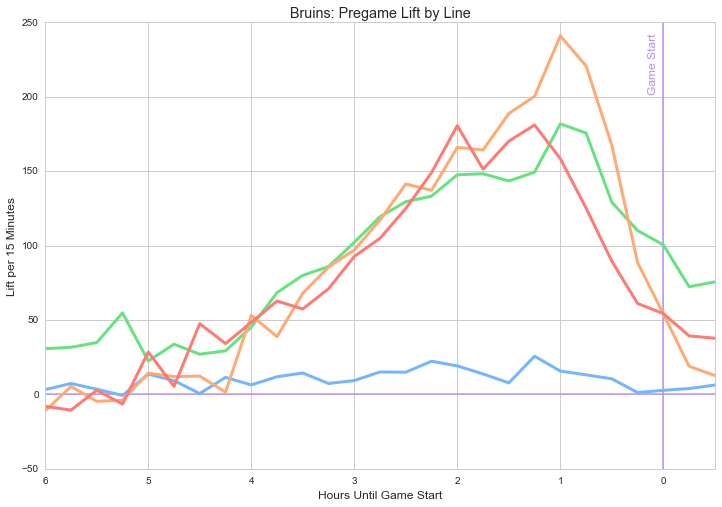

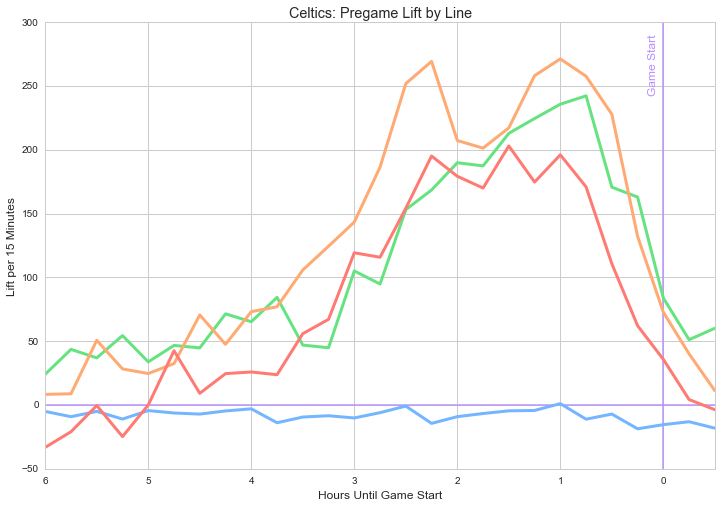

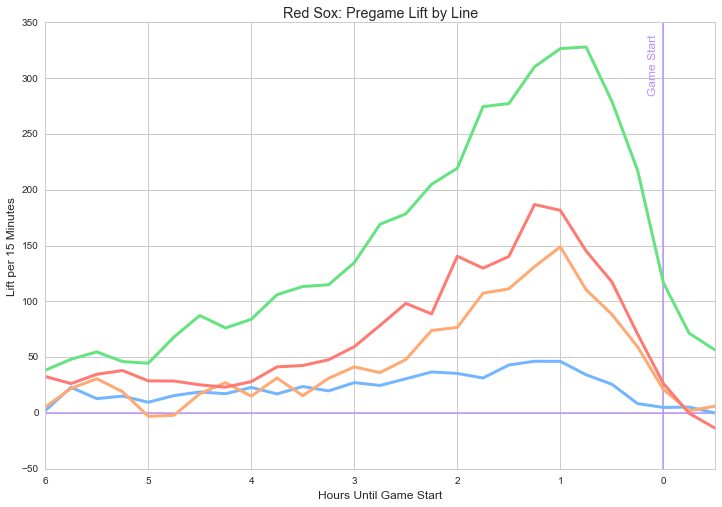

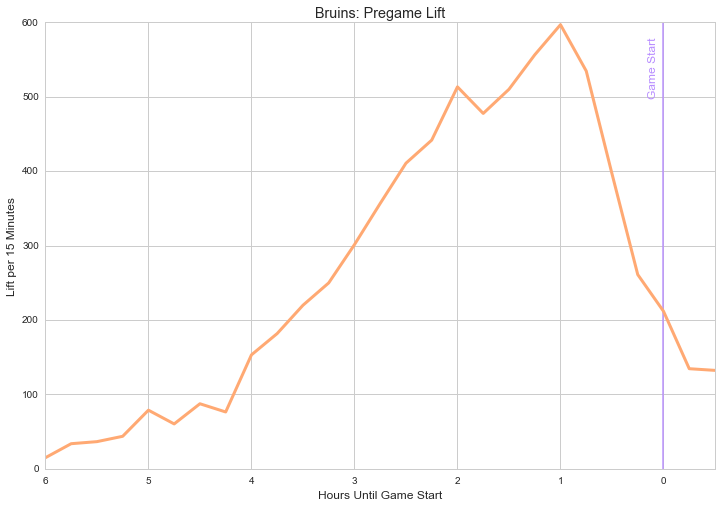

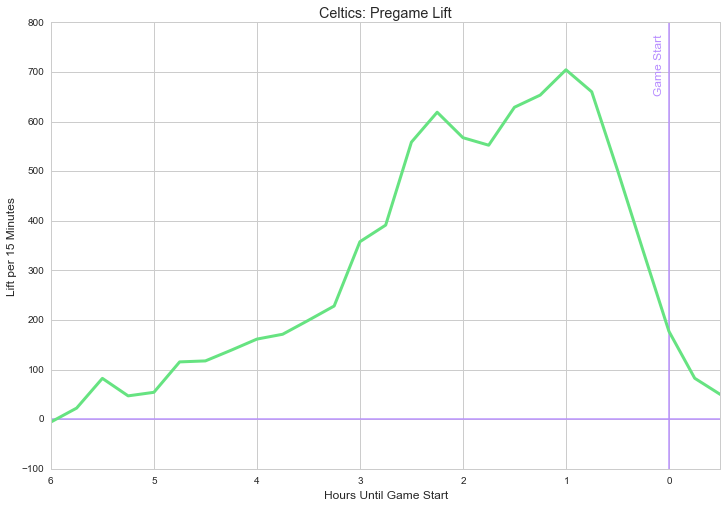

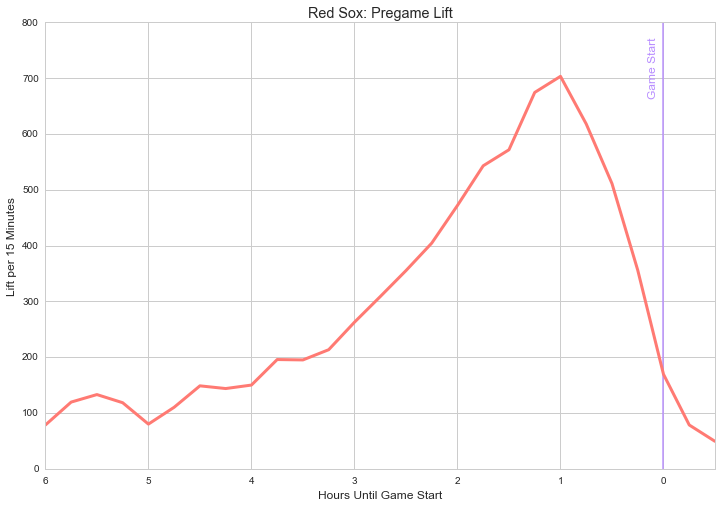

In [8]:
# Chart by station.
chart_pregame_lift(True)
# Chart aggregate.
chart_pregame_lift(False)

Repeat the above for our final report.

In [17]:
ax.rowNum

2

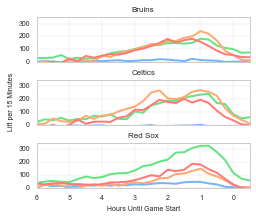

In [22]:
# Set format.
chart_format = 'report_inline'

# Start plotting.
fig, axes = plt.subplots(3,1,sharex=True,sharey=True)

# Plot once per team.
for ax, team in zip(axes,teams):
    # Get data; traverse lines and plot.
    pregame_agg_team = pregame_agg_hours[team]
    for c, line_name in zip(line_lift_cols, line_names):
        ax.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team[c], label=line_name, c=line_colors[line_name.lower()], lw=line_widths[chart_format])
    # Prettify.
    ax.invert_xaxis()
    # Title.
    ax.set_title(team_names[team], fontsize=fontsize['title'][chart_format])
    # Fix ticks.
    ax.set_yticklabels(np.arange(0,400,100), fontsize=fontsize['ticks'][chart_format])
    # Fix grid.
    ax.grid(**grid_settings[chart_format])
    # Add y label only for middle chart.
    if ax.rowNum == 1:
        ax.set_ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][chart_format])

# Handle size.
fig.set_figheight(3)
fig.set_figwidth(figsize[chart_format][0])

# Fix axes.
plt.ylim((0,plt.ylim()[1]))
plt.xlim((plt.xlim()[0],-.5))
# Fix ticks.
plt.yticks(np.arange(0,400,100))
plt.xticks(fontsize=fontsize['ticks'][chart_format])

# Labels and title.
plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][chart_format])

# Fix spacing.
plt.subplots_adjust(hspace=.4, left=.13, right=1, bottom=.13, top=.92)

# Save to PDF if needed.
if chart_format == 'report_inline':
    plt.savefig('./pregame.pdf')

# Show.
plt.show()

### Aggregate Pregame Lift, All Teams

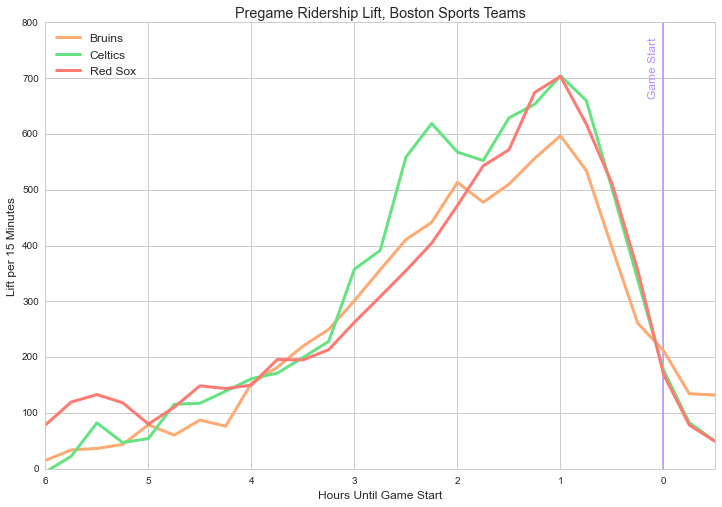

In [11]:
# Start plotting.
plt.figure(figsize=figsize[default_chart_format])

# Traverse lines and plot.
for team in teams:
    pregame_agg_team = pregame_agg_hours[team]
    plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team.lift_entries, c=team_colors_pastel[team], lw=line_widths[default_chart_format], label=team_names[team])

# Limits and axes.
plt.xlim((pregame_agg_team.hours_until_game_start.min(), pregame_agg_team.hours_until_game_start.max()))
plt.gca().invert_xaxis()

# Grid.
plt.grid(**grid_settings[default_chart_format])

# Limits.
plt.ylim((0,plt.ylim()[1]))

# Labels.
plt.title('Pregame Ridership Lift, Boston Sports Teams', fontsize=fontsize['title'][default_chart_format])
plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][default_chart_format])
plt.ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][default_chart_format])
plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

# Legend.
plt.legend(loc=2, fontsize=fontsize['legend'][default_chart_format])

# Annotations.
game_start_line(fontsize=fontsize['game_range'][default_chart_format], line_alpha=.7, axis_rev=True)

# Save PDF.
if default_chart_format == 'poster':
    plt.savefig('pregame_lift_all_teams.pdf')

# Show.
plt.show()

### Small Charts by Line

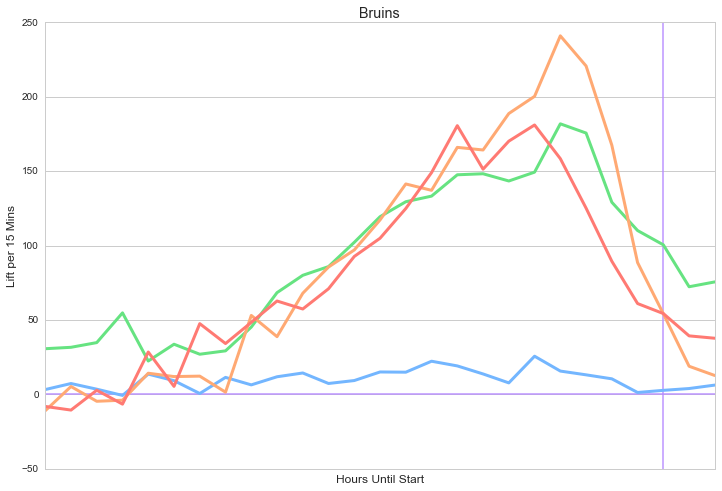

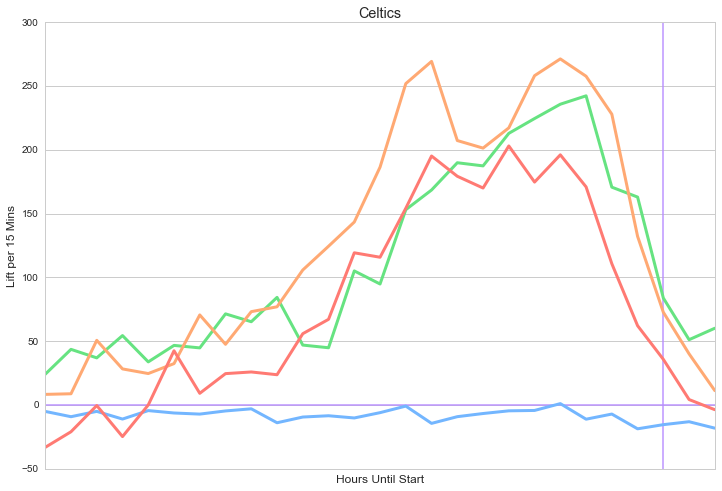

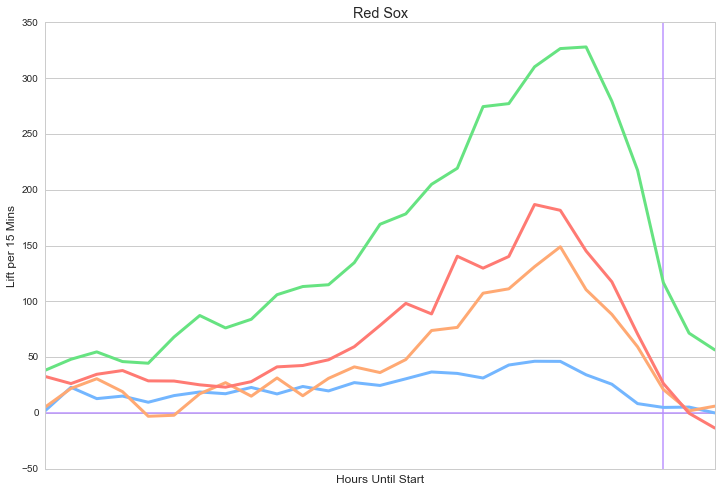

In [12]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])

    # Traverse lines and plot.
    pregame_agg_team = pregame_agg_hours[team]
    for c, line_name in zip(line_lift_cols, line_names):
        plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team[c], label=line_name, c=line_colors[line_name.lower()], lw=line_widths[default_chart_format])

    # Limits and axes.
    plt.xlim((pregame_agg_team.hours_until_game_start.min(), pregame_agg_team.hours_until_game_start.max()))
    plt.gca().invert_xaxis()

    # Grid.
    plt.grid(**grid_settings[default_chart_format])

    # Labels.
    plt.title(team_names[team], fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Hours Until Start', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Lift per 15 Mins', fontsize=fontsize['label'][default_chart_format])
    plt.xticks([], fontsize=fontsize['ticks'][default_chart_format])
    plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

    # Annotations.
    game_start_line(fontsize=fontsize['game_range'][default_chart_format], line_alpha=.7, show_text=False)
    if plt.ylim()[0] < 0:
        zero_horizontal_line(line_alpha=.7)
    
    # Save PDF.
    if default_chart_format == 'poster_small':
        plt.savefig('pregame_lift_line_'+team+'.pdf')

    # Show.
    plt.show()

### Pregame Lift by Sport, Station

Chart pregame lift by sport and station.

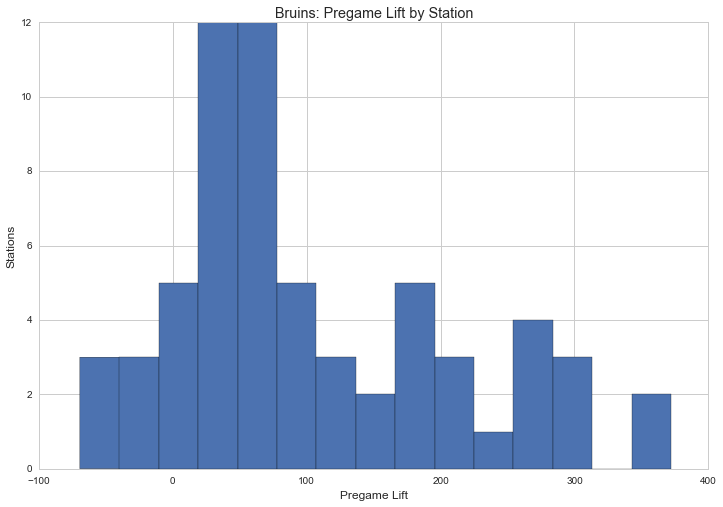

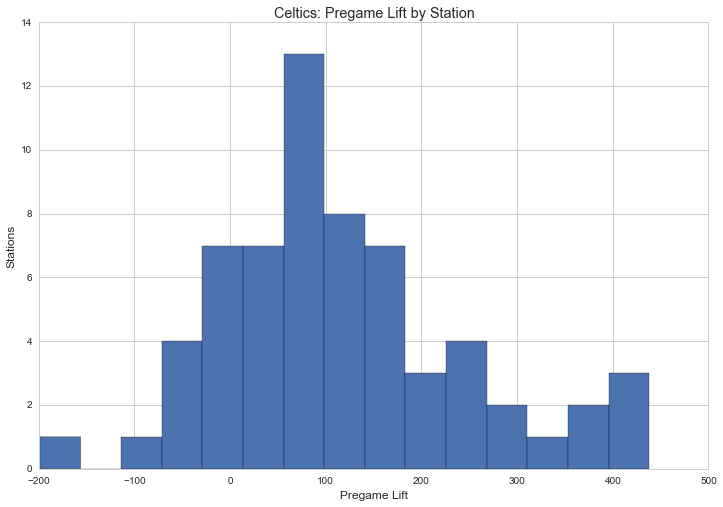

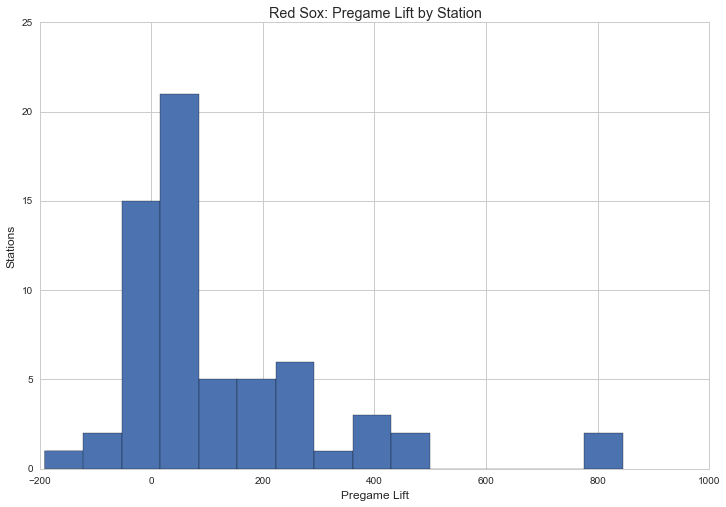

In [13]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])

    # Plot each station.
    pregame_stations_agg_team = pregame_stations_agg[team]
    plt.hist(pregame_stations_agg_team.lift_entries, bins=2*np.sqrt(len(pregame_stations_agg_team)))

    # Labels.
    plt.grid(**grid_settings[default_chart_format])
    plt.title(team_names[team]+': Pregame Lift by Station', fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Pregame Lift', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Stations', fontsize=fontsize['label'][default_chart_format])
    plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
    plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

    # Show.
    plt.show()

### Pregame Lift by Line

Aggregate mean pregame lift for each line, by sport.

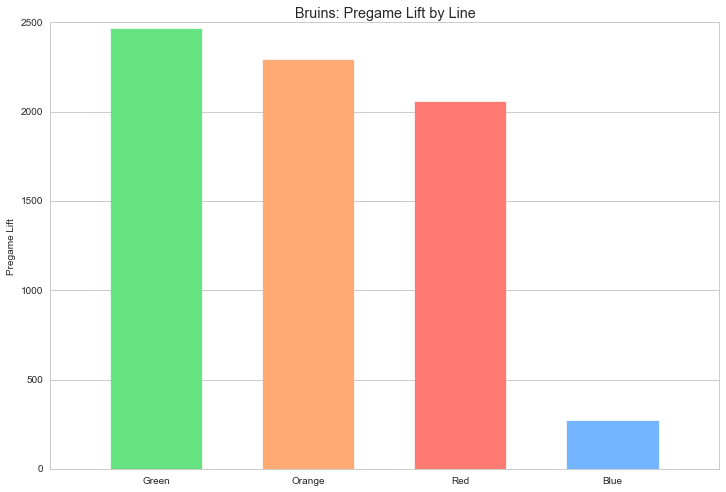

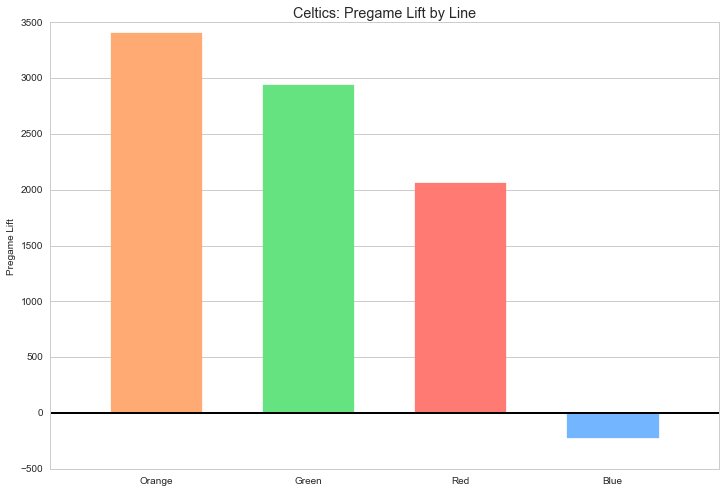

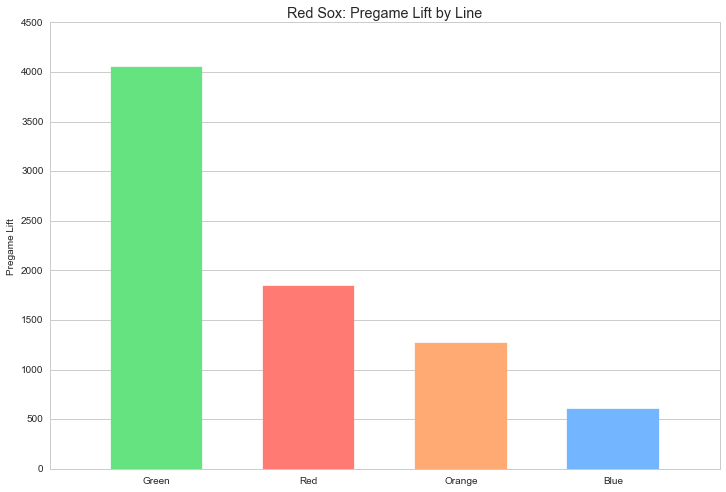

In [14]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])
    
    # Bar settings.
    bar_width = .6

    # Aggregate by line.
    pregame_agg_team = pregame_agg_hours[team]
    pregame_agg_team = pd.DataFrame(pregame_agg_team.sum().drop(['hours_until_game_start','lift_entries'])).reset_index()
    pregame_agg_team.columns = ['line','lift_entries']
    pregame_agg_team.sort('lift_entries',ascending=False,inplace=True)
    pregame_agg_team.line = pregame_agg_team.line.str.replace('lift_entries_','')
    
    # Plot.
    bars = plt.bar(np.arange(len(pregame_agg_team)), pregame_agg_team.lift_entries, width=bar_width)
    
    # Limits.
    plt.xlim((-(1-bar_width), len(pregame_agg_team)))
    
    # Annotations.
    if (plt.ylim()[0] < 0):
        zero_horizontal_line(line_color='black', line_alpha=1)
    
    # Colors.
    for bar,line in zip(bars, pregame_agg_team.line):
        bar.set_color(line_colors[line.lower()])

    # Labels and ticks.
    plt.title(team_names[team]+': Pregame Lift by Line', fontsize=fontsize['title'][default_chart_format])
    plt.ylabel('Pregame Lift', fontsize=fontsize['tick_labels'][default_chart_format])
    plt.xticks(np.arange(len(pregame_agg_team))+bar_width/2, [l.title() for l in pregame_agg_team.line], fontsize=fontsize['tick_labels'][default_chart_format])
    plt.grid(axis='x', b=False)

    # Show.
    plt.show()

### Pregame Lift Distribution by Sport, Game

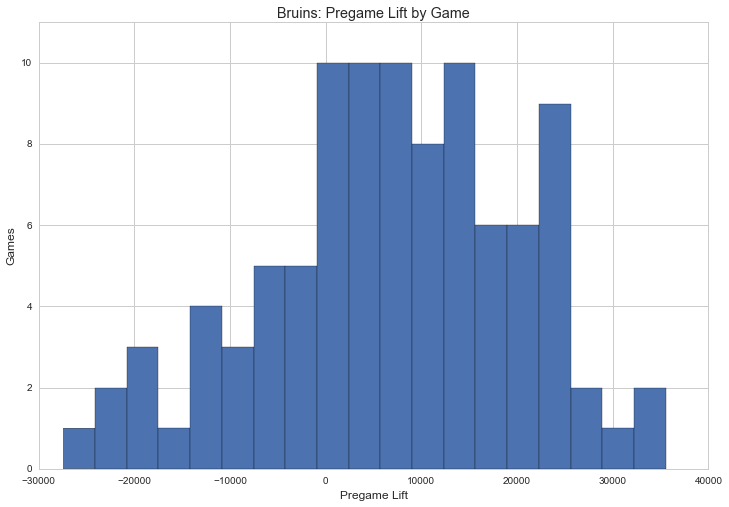

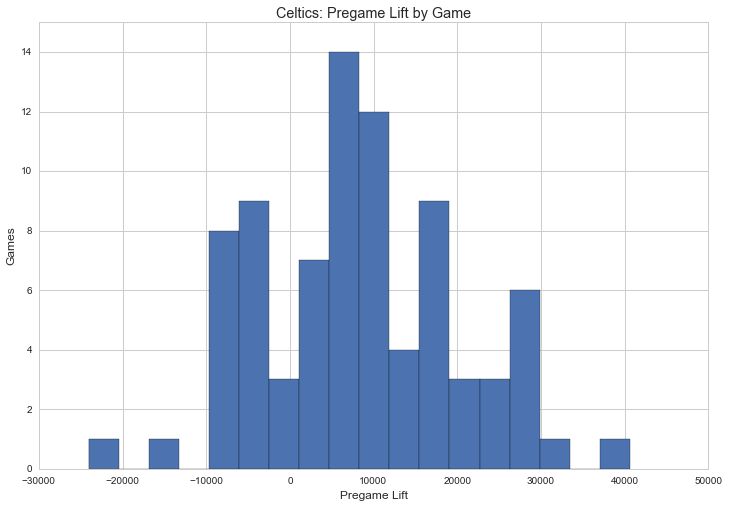

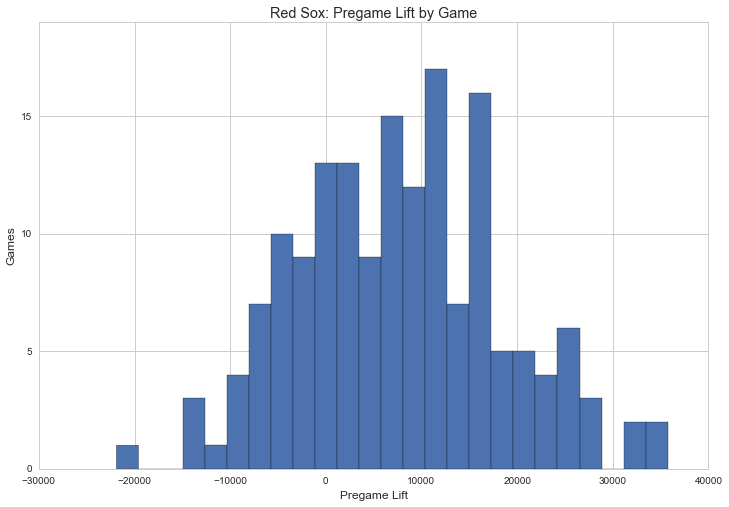

In [15]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])

    # Plot each station.
    pregame_agg_team = pregame_agg_game[team]
    plt.hist(pregame_agg_team.lift_entries, bins=2*np.sqrt(len(pregame_agg_team)))

    # Labels.
    plt.grid(**grid_settings[default_chart_format])
    plt.title(team_names[team]+': Pregame Lift by Game', fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Pregame Lift', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Games', fontsize=fontsize['label'][default_chart_format])
    plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
    plt.yticks(fontsize=fontsize['ticks'][default_chart_format])
    
    # Adjust limits.
    ylim = plt.ylim()
    plt.ylim((ylim[0], ylim[1]+1))

    # Show.
    plt.show()

---
## Statistics

TODO